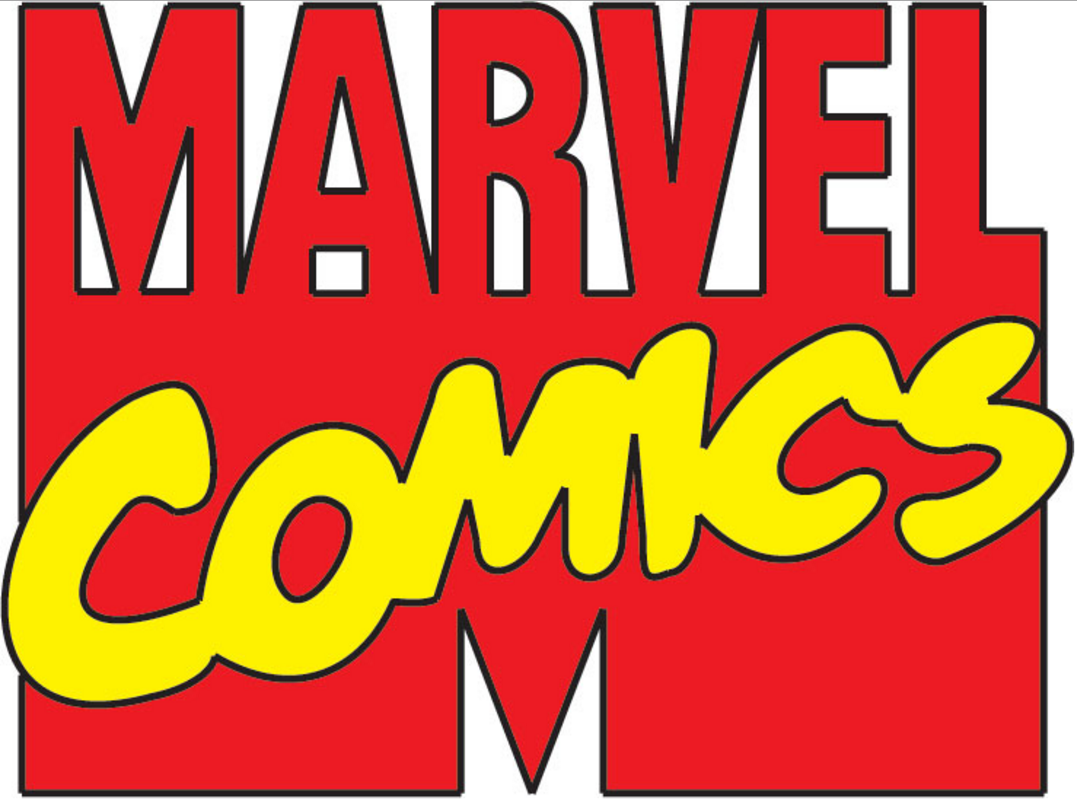

In [3]:
import chart_studio.plotly
import plotly.graph_objs as go
from chart_studio.plotly import plot, iplot
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import networkx as nx 
#matplotlib inline 
from IPython.display import display
from PIL import Image


path=('C:/Users/Loura Shiny/Desktop/SIN/Project/marvel_image.png')
display(Image.open(path))

### Reading Data

In [4]:
e = pd.read_csv('C:/Users/Loura Shiny/Desktop/SIN/Project/Dataset/edges.csv') # Edges
h = pd.read_csv('C:/Users/Loura Shiny/Desktop/SIN/Project/Dataset/hero-network.csv') # Hero
n = pd.read_csv('C:/Users/Loura Shiny/Desktop/SIN/Project/Dataset/nodes.csv') # Nodes

### About each graph

In [5]:
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574467 entries, 0 to 574466
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   hero1   574467 non-null  object
 1   hero2   574467 non-null  object
dtypes: object(2)
memory usage: 8.8+ MB


In [6]:
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574467 entries, 0 to 574466
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   hero1   574467 non-null  object
 1   hero2   574467 non-null  object
dtypes: object(2)
memory usage: 8.8+ MB


In [7]:
n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19090 entries, 0 to 19089
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   node    19090 non-null  object
 1   type    19090 non-null  object
dtypes: object(2)
memory usage: 298.4+ KB


In [8]:
he = nx.from_pandas_edgelist(h, source = "hero1", target = "hero2")
nx.info(he)

#Returns a graph from Pandas DataFrame containing an edge list. The Pandas DataFrame should contain at least two columns of node names and zero or more columns of edge attributes. Each row will be processed as one edge instance.

'Graph with 6426 nodes and 167219 edges'

## Degree Centrality

In [9]:
#Degree Centrality - to calculate the centre of the group
MF = nx.degree_centrality(he)

#printing top 5
print("Degree Centrality Top 5: \n")
counter = 0
for w in sorted(MF, key = MF.get , reverse = True):
    counter = counter + 1
    if counter == 6:
        break
    print(w,'{:0.2f}'.format(MF[w]))

Degree Centrality Top 5: 

CAPTAIN AMERICA 0.30
SPIDER-MAN/PETER PAR 0.27
IRON MAN/TONY STARK  0.24
THING/BENJAMIN J. GR 0.22
MR. FANTASTIC/REED R 0.21


## Eigen Vector

In [ ]:
#EigenVector - the top 5 of knowing more superheroes for (appeared, help, fight along , etc)

EV = nx.eigenvector_centrality(he)

#printing top 5
print("Eigen Value Top 5: \n")
counter = 0
for w in sorted(EV, key =EV.get,  reverse = True):
    counter = counter + 1
    if counter == 6:
        break
    print(w,"{:0.4f}".format(EV[w]))

Eigen Value Top 5: 

CAPTAIN AMERICA 0.1168
IRON MAN/TONY STARK  0.1025
SCARLET WITCH/WANDA  0.1008
THING/BENJAMIN J. GR 0.1008
SPIDER-MAN/PETER PAR 0.1002


## Betweeness_Centrality

In [ ]:
#Betweeness_Centrality - This is the guy who know everyone and the one who can get what you need, the top 5 friend that any super heroe should have arer (appeared, help, fight along , etc)

BC = nx.betweenness_centrality(he)

#printing top 5
print("Betweeness Centrality Top 5: \n")
counter = 0
for w in sorted(BC, key =BC.get,  reverse = True):
    counter = counter + 1
    if counter == 6:
        break
    print(w,"{:0.4f}".format(BC[w]))

In [14]:
import igraph as ig

#Numbers of Nodes
N = he.number_of_nodes()

#List of Edge
L = he.number_of_edges()

#Graph objects
Edges_name = [e for e in he.edges()] #Edges Names

Edges= nx.convert_node_labels_to_integers(he) #Mapping all Nodes into Numbers
Edges = [e for e in Edges.edges()]

#Graph
G = ig.Graph(Edges, directed = False)

# Geolocalization
layt = G.layout('kk',dim = 3)  #3D Localization

#Given X,y,z Position
Xn=[layt[k][0] for k in range(N)]# x-coordinates of nodes
Yn=[layt[k][1] for k in range(N)]# y-coordinates
Zn=[layt[k][2] for k in range(N)]# z-coordinates

Xe=[]
Ye=[]
Ze=[]

#Grouping Coordinates
for e in Edges:
    Xe+=[layt[e[0]][0],layt[e[1]][0], None]# x-coordinates of edge ends
    Ye+=[layt[e[0]][1],layt[e[1]][1], None]
    Ze+=[layt[e[0]][2],layt[e[1]][2], None]

#Nodes Name 
labels = []
group = []

for i in range(len(Edges_name)):
    value = Edges_name[i][0]
    labels.append(value)
    
for i in range(len(Edges)):
    value = Edges[i][0]
    group.append(value)
    
group =[]
group.extend(np.repeat(1,2000))
group.extend(np.repeat(2,2000))
group.extend(np.repeat(3,3000))
group.extend(np.repeat(4,1000))
group.extend(np.repeat(5,2000))

trace1=go.Scatter3d(x=Xe,y=Ye,z=Ze,mode='lines', line=dict(color='rgb(125,125,125)', width=1),hoverinfo='none')

trace2=go.Scatter3d(x=Xn,y=Yn,z=Zn,mode='markers',name='SuperHeroe',marker=dict(symbol='circle',size=4,color=group,colorscale='Viridis',line=dict(color='rgb(50,50,50)', width=0.5)),text=labels,hoverinfo='text')

axis=dict(showbackground=False,showline=False,zeroline=False,showgrid=False,showticklabels=False,title='')

In [ ]:
layout = go.Layout(
         title="Network Of appaerance of Marvel<br> SuperHeroes (3D visualization)",
    autosize=True,
         width=1000,
         height=1000,
         showlegend=False,
         scene=dict(
             xaxis=dict(axis),
             yaxis=dict(axis),
             zaxis=dict(axis),
        ),
     margin=dict(
        t=100
    ),
    hovermode='closest',
    annotations=[
           dict(
           showarrow=False,
            text="Done by Msc. Marvin Garcia",
            xref='paper',
            yref='paper',
            x=0,
            y=0.1,
            xanchor='left',
            yanchor='bottom',
            font=dict(
            size=14
            )
            )
        ],    )

data=[trace1, trace2]
fig=go.Figure(data=data, layout=layout)
fig.show()